In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
import subprocess

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
class AZmet:
    def __init__ (self, filename):
        file = pd.read_csv(filename, names = ["Year", "Day", "Hour", 
                                            "Air Temperature", "Relative Humidity", 
                                            "VPD", "Solar Radiation", "Precipitation", 
                                            "4 inch Soil T", "12 inch Soil T", 
                                            "Avg Wind Speed", "Wind Vector Magnitude", 
                                            "Wind Vector Direction", "Wind Direction STDEV", 
                                            "Max Wind Speed", "Reference Evapotranspiration", 
                                            "Actual Vapor Pressure", "Dewpoint"])
        file_df = pd.DataFrame(file)
        file_df['combined'] = file_df["Year"]*1000 + file_df["Day"]
        file_df["date"] = pd.to_datetime(file_df["combined"], format = "%Y%j")
        data = file_df.set_index('date')
        del data['combined']
        self.__data__ = data
        
    def specific_time(self, date1, date2):
        data = self.__data__
        specific_time_start = data[data.index >= date1]
        specific_time_end = specific_time_start[specific_time_start.index <= date2]
        return specific_time_end
   
    
filename = AZmet('/Users/sebastiancalleja/Desktop/OneDrive - University of Arizona/Graduate School/Cotton_Inc_Report/2021 Annual Report/AZmet_2020data_req.csv')

In [3]:
azmet_2020 = AZmet.specific_time(filename, '2020-01-01', '2020-12-31')

In [4]:
azmet_2020 = azmet_2020.reset_index()

In [5]:
day_only = azmet_2020[azmet_2020['Solar Radiation'] >  0.0] 

In [6]:
single_day = day_only[day_only['Day'] == 224]

In [7]:
x = single_day['Hour'].to_numpy()
y = single_day['Air Temperature'].to_numpy()

In [8]:
df = pd.DataFrame(x, y).reset_index()
df = df.rename(columns = {'index':'y', 0:'x'})

<AxesSubplot:xlabel='x', ylabel='y'>

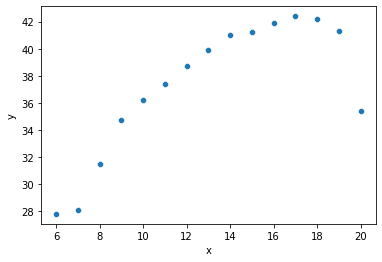

In [9]:
sns.scatterplot(data = df, x = 'x', y = 'y')

## Other Methods